### Swarm Behaviour Research Case Study

The SwarmyAI Hub is currently engaged in research studies to investigate behavioural pattern of swarms in their habitat. A typical swarm exhibit a **"flocking"** or **"non-flocking"** pattern in their movement from one place to another. In addition to this individual movement style, while in a group, in their movement pattern may be aligned or not.

As urgency demands in Swarmy's next publication, the hub requires your service as a ML Engineer to develop predictive model to determine to the movement pattern of some swarms that are yet to be categorised based on their ***flocking or non-flocking movement pattern only***. You have been provided with previously categorized and yet to dataset of the swarm movement pattern. Based on this, you are require to:-
 * perform descriptive statistics, EDA and data preprocessing (if needed)
 * build a baseline (simple) model
 * explore II other hyperparameterized models
 * evaluate the performance of your best model on the test dataset using appropriate metric
 * visualize and interprete the confusion matrix of your class label prediction on the test dataset

 
 
Dataset Attribute Information: The attributes are xm, ym as the (X,Y) position of each boid, xVeln, yVeln as the velocity vector, xAm, yAm as the alignment vector, xSm, ySm as the separation vector, xCm, yCm as the cohesion vector, nACm as the number of boids in the radius of Alignment/Cohesion, and nSm as the number of boids in the radius of Separation. **The class label is 1 - flocking and 0 - non-flocking**

### Let's import the needed libaries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from pylab import scatter, show, legend, xlabel, ylabel

from sklearn import metrics

pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
warnings.filterwarnings('ignore')

In [119]:
path_to_data  = r'/Users/mac/Desktop/Bytework-assessment/AI_ML_Assessment/swarm_train_data.csv'
train_df = pd.read_csv(path_to_data, low_memory=False)

print(train_df.shape)
#Let's check the first five row of our dataset
train_df.head(5)

(18013, 2401)


,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,nAC1,nS1,x2,y2,xVel2,yVel2,xA2,yA2,xS2,yS2,xC2,yC2,nAC2,nS2,x3,y3,xVel3,yVel3,xA3,yA3,xS3,yS3,xC3,yC3,nAC3,nS3,x4,y4,xVel4,yVel4,xA4,yA4,xS4,yS4,xC4,yC4,nAC4,nS4,x5,y5,xVel5,yVel5,xA5,yA5,xS5,yS5,xC5,yC5,nAC5,nS5,...,y196,xVel196,yVel196,xA196,yA196,xS196,yS196,xC196,yC196,nAC196,nS196,x197,y197,xVel197,yVel197,xA197,yA197,xS197,yS197,xC197,yC197,nAC197,nS197,x198,y198,xVel198,yVel198,xA198,yA198,xS198,yS198,xC198,yC198,nAC198,nS198,x199,y199,xVel199,yVel199,xA199,yA199,xS199,yS199,xC199,yC199,nAC199,nS199,x200,y200,xVel200,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Class
0,-489.28,-658.11,2.51,3.28,0.0,0.0,-0.26,0.35,0.93,-0.37,45,17,-1009.24,380.07,-2.83,-1.86,0.0,0.0,0.40,-0.19,-0.88,0.47,112,33,-1017.81,410.42,-2.91,2.47,0.0,0.0,0.25,0.36,-0.66,-0.75,112,37,-486.08,-660.20,-0.50,-3.48,0.0,0.0,-0.15,0.41,0.65,-0.76,45,21,499.77,650.58,-1.79,3.12,0.0,0.0,-0.19,0.40,0.87,-0.49,37,13,...,617.53,1.15,-3.13,0.0,0.0,-0.02,-0.44,0.02,1.00,37,17,-1037.88,416.39,-0.96,-1.76,0.0,0.0,-0.19,0.40,0.35,-0.94,112,29,-467.98,-668.21,-1.82,3.24,0.0,0.0,0.44,0.00,-0.94,0.35,45,22,502.45,658.55,0.12,-2.93,0.0,0.0,-0.06,0.44,0.61,-0.79,37,5,-1010.41,398.19,1.60,-4.17,0.0,0.0,0.33,0.29,-0.87,-0.50,112,40,1
1,-540.61,-670.93,-1.02,-4.76,0.0,0.0,-0.06,0.44,0.24,-0.97,45,2,-1108.55,453.21,2.96,-2.65,0.0,0.0,-0.37,-0.24,0.81,0.59,112,33,-1103.46,474.24,1.14,-2.29,0.0,0.0,-0.15,0.41,0.60,-0.80,112,34,-494.13,-733.68,0.66,-2.98,0.0,0.0,0.39,-0.20,-0.92,0.40,45,5,538.94,585.77,4.43,-1.31,0.0,0.0,0.22,-0.38,-0.63,0.78,37,11,...,572.02,3.06,0.52,0.0,0.0,-0.37,-0.24,0.59,0.81,37,3,-1180.26,-138.40,0.51,3.53,0.0,0.0,0.00,0.00,0.14,0.99,108,0,-504.50,-716.51,-1.82,-2.85,0.0,0.0,0.38,0.22,-0.99,-0.12,45,11,492.70,604.09,-1.75,1.29,0.0,0.0,-0.42,0.12,1.00,0.09,37,6,-1076.23,504.68,-1.37,-4.43,0.0,0.0,-0.15,0.41,-0.46,-0.89,112,9,1
2,379.83,-521.18,1.86,7.31,0.0,0.0,0.00,0.00,0.00,0.00,1,0,-150.48,-865.12,-3.40,8.45,0.0,0.0,0.00,0.00,0.00,0.00,4,0,1147.27,-336.29,2.47,-7.49,0.0,0.0,-0.48,0.88,0.00,0.00,6,1,1389.61,-305.15,4.89,6.94,0.0,0.0,0.00,0.00,0.00,0.00,2,0,-44.35,-823.24,-2.28,7.21,0.0,0.0,0.00,0.00,0.00,0.00,2,0,...,-675.91,8.22,4.28,0.0,0.0,0.00,0.00,0.00,0.00,3,0,824.23,-45.78,1.65,7.97,0.0,0.0,0.00,0.00,0.00,0.00,4,0,-1313.09,-886.29,8.22,3.46,0.0,0.0,0.00,0.00,0.00,0.00,3,0,-1378.23,-802.19,6.29,7.16,0.0,0.0,0.00,0.00,0.00,0.00,4,0,-1038.59,91.30,7.96,1.33,0.0,0.0,0.00,0.00,0.00,0.00,4,0,1
3,888.21,-146.53,-2.67,-18.10,0.0,0.0,0.00,0.00,0.00,0.00,3,0,624.18,-83.83,-1.79,9.57,0.0,0.0,0.00,0.00,0.00,0.00,4,0,339.49,685.16,-12.10,-9.18,0.0,0.0,0.00,0.00,0.00,0.00,4,0,-487.34,271.33,-6.15,-12.80,0.0,0.0,0.00,0.00,0.00,0.00,4,0,-680.20,-752.29,5.67,-4.07,0.0,0.0,0.00,0.00,0.00,0.00,61,0,...,-308.63,-9.56,-8.82,0.0,0.0,0.00,0.00,0.00,0.00,6,0,1320.20,503.95,7.04,-6.85,0.0,0.0,0.00,0.00,0.00,0.00,0,0,413.66,-996.01,0.35,-12.97,0.0,0.0,0.00,0.00,0.00,0.00,40,1,1197.72,-590.32,-11.07,-3.72,0.0,0.0,0.00,0.00,0.00,0.00,7,0,703.44,187.44,1.04,-2.19,0.0,0.0,0.00,0.00,0.00,0.00,3,1,0
4,-452.43,-632.15,2.66,-2.63,0.0,0.0,-0.12,0.42,0.01,-1.00,45,5,-998.40,387.08,1.87,-4.29,0.0,0.0,0.42,-0.12,-0.86,0.50,112,40,-1013.45,388.73,2.01,0.17,0.0,0.0,0.09,-0.43,-0.38,0.93,112,49,-425.48,-705.09,0.52,2.27,0.0,0.0,0.31,-0.31,-0.68,0.73,45,6,580.06,551.02,-2.06,-0.57,0.0,0.0,0.22,-0.38,-0.02,1.00,37,12,...,571.86,0.23,-3.62,0.0,0.0,0.37,0.23,0.89,-0.46,37,12,-1038.16,416.16,1.42,2.26,0.0,0.0,-0.38,0.22,0.87,-0.49,112,34,-434.37,-684.72,0.61,2.09,0.0,0.0,0.31,0.32,-0.89,0.46,45,13,561.13,590.30,0.54,3.63,0.0,0.0,-0.39,0.19,0.74,-0.67,37,10,-927.32,415.74,-3.35,2.54,0.0,0.0,0.00,0.00,-1.00,-0.10,112,0,1


## 1. perform descriptive statistics, EDA and data preprocessing (if needed)

### Data Preprocessing

In [120]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18013 entries, 0 to 18012
Columns: 2401 entries, x1 to Class 
dtypes: float64(1999), int64(401), object(1)
memory usage: 330.0+ MB


From the above, we can see that we have a column of dtype objects. Let's look this column transfrom the column to the right dtype

### Imputing missing numeric

In [121]:
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = train_df.select_dtypes(include=np.number).columns.tolist()
# train_df[categorical_cols][12648:12650]
train_df[categorical_cols] = pd.to_numeric(train_df.x1, errors='coerce').fillna(0).astype(float)

Let's check the descriptive statistic of our DataFrame using the describe function in pandas

In [122]:
train_df.describe()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,nAC1,nS1,x2,y2,xVel2,yVel2,xA2,yA2,xS2,yS2,xC2,yC2,nAC2,nS2,x3,y3,xVel3,yVel3,xA3,yA3,xS3,yS3,xC3,yC3,nAC3,nS3,x4,y4,xVel4,yVel4,xA4,yA4,xS4,yS4,xC4,yC4,nAC4,nS4,x5,y5,xVel5,yVel5,xA5,yA5,xS5,yS5,xC5,yC5,nAC5,nS5,...,y196,xVel196,yVel196,xA196,yA196,xS196,yS196,xC196,yC196,nAC196,nS196,x197,y197,xVel197,yVel197,xA197,yA197,xS197,yS197,xC197,yC197,nAC197,nS197,x198,y198,xVel198,yVel198,xA198,yA198,xS198,yS198,xC198,yC198,nAC198,nS198,x199,y199,xVel199,yVel199,xA199,yA199,xS199,yS199,xC199,yC199,nAC199,nS199,x200,y200,xVel200,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Class
count,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.00000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,...,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.00000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.00000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000
mean,106.430785,-76.184822,-0.733670,0.183239,-0.148906,0.158274,-1.304686,-0.870929,-0.037237,0.076594,19.172986,1.181091,-149.058991,14.573515,-0.971004,1.345545,-0.106831,0.075599,-0.130769,-0.740191,-0.063419,-0.005339,26.169378,2.343863,-116.960031,31.517517,0.019750,-0.396623,-0.135393,0.142930,7.417606,-4.970250,-0.047590,0.103006,24.749792,2.465664,-178.513461,-21.393746,-1.06857,0.218182,-0.118028,0.129106,-0.191642,-0.119962,-0.040369,0.063915,22.051074,1.330928,164.890126,-13.345597,0.902669,0.125691,-0.117407,0.138452,-0.213923,0.463458,-0.080433,0.099078,20.961361,1.067840,...,32.550717,-2.174911,-1.062153,-0.103439,0.126796,-2.062364,-1.297478,-0.058796,0.124968,21.804808,1.272970,-192.982355,-5.385172,1.186201,0.741804,-0.097139,0.162422,37.623018,-3.551632,-0.101310,0.129202,25.080997,2.219730,111.243449,-83.173349,-0.381477,-0.550650,-0.100476,0.142391,1.675679,1.706106,-0.080315,0.091856,21.558541,1.212014,-21.398034,-21.977822,-0.110945,0.648021,-0.098286,0.126548,-92.452552,-110.167210,-0.04102,0.128616,21.244823,1.181369,-52.609677,-5.948542,-1.64858,0.215071,-0.125053,0.134539,-1.656987,-0.080935,-0.015850,0.090184,26.488925,2.190029,0.516682
std,843.693091,572.116169,6.409622,7.376411,0.376818,0.593320,29.355828,22.649405,0.565769,0.637191,23.389772,3.684369,813.801917,546.843494,5.541655,8.026952,0.379309,0.532907,6.986137,24.831683,0.546096,0.580629,36.380918,8.420759,785.299031,548.732079,6.263967,7.463589,0.374562,0.589606,277.665680,189.372884,0.538881,0.636706,34.242667,8.591385,697.972366,563.348196,5.33983,8.207116,0.390189,0.569850,3.856528,7.550522,0.571005,0.607899,27.621105,3.621119,805.419189,573.640837,6.172266,7.747345,0.401604,0.577938,11.265983,21.034052,0.552933,0.633581,26.519167,3.064604,...,566.235453,5.329118,7.914083,0.40

## Scaling Numeric Features

In [123]:
from sklearn.preprocessing import MinMaxScaler

In [125]:
scaler = MinMaxScaler().fit(train_df[numeric_cols + categorical_cols])

In [126]:
train_df[numeric_cols + categorical_cols] = scaler.transform(train_df[numeric_cols + categorical_cols])

In [127]:
train_df.describe()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,nAC1,nS1,x2,y2,xVel2,yVel2,xA2,yA2,xS2,yS2,xC2,yC2,nAC2,nS2,x3,y3,xVel3,yVel3,xA3,yA3,xS3,yS3,xC3,yC3,nAC3,nS3,x4,y4,xVel4,yVel4,xA4,yA4,xS4,yS4,xC4,yC4,nAC4,nS4,x5,y5,xVel5,yVel5,xA5,yA5,xS5,yS5,xC5,yC5,nAC5,nS5,...,y196,xVel196,yVel196,xA196,yA196,xS196,yS196,xC196,yC196,nAC196,nS196,x197,y197,xVel197,yVel197,xA197,yA197,xS197,yS197,xC197,yC197,nAC197,nS197,x198,y198,xVel198,yVel198,xA198,yA198,xS198,yS198,xC198,yC198,nAC198,nS198,x199,y199,xVel199,yVel199,xA199,yA199,xS199,yS199,xC199,yC199,nAC199,nS199,x200,y200,xVel200,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Class
count,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,...,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000
mean,0.539167,0.461720,0.481822,0.501977,0.425547,0.567781,0.931007,0.782376,0.493053,0.514290,0.122121,0.032808,0.446885,0.508208,0.475596,0.552728,0.457436,0.553518,0.165604,0.724826,0.488168,0.499004,0.166684,0.036623,0.459233,0.516386,0.498092,0.503106,0.443435,0.560260,0.005069,0.982101,0.491121,0.519218,0.176784,0.023708,0.437156,0.490410,0.467974,0.515867,0.451947,0.572350,0.425989,0.513318,0.492468,0.511924,0.132838,0.047533,0.557635,0.494432,0.523702,0.501374,0.452252,0.578716,0.474994,0.148174,0.484994,0.518485,0.155269,0.039550,...,0.516155,0.434377,0.486330,0.448280,0.563060,0.981860,0.952739,0.489031,0.523315,0.131354,0.037440,0.431526,0.496636,0.515742,0.523393,0.454160,0.569815,0.074903,0.637033,0.481099,0.524105,0.180439,0.032170,0.539547,0.459901,0.489184,0.489154,0.455210,0.584440,0.025657,0.076642,0.485016,0.517137,0.156221,0.030300,0.492227,0.490442,0.495636,0.517038,0.458972,0.571149,0.946682,0.936786,0.492347,0.523996,0.152840,0.047255,0.481909,0.497550,0.454657,0.504600,0.448503,0.556147,0.940569,0.842841,0.497043,0.516825,0.186542,0.034219,0.516682
std,0.299159,0.282753,0.172953,0.199147,0.188409,0.290843,0.028990,0.020920,0.105554,0.118879,0.148979,0.102344,0.288920,0.270590,0.150099,0.208438,0.185936,0.246716,0.008063,0.017765,0.101884,0.108326,0.231726,0.131574,0.278351,0.270884,0.170124,0.195843,0.183609,0.289022,0.020421,0.020158,0.100538,0.118789,0.244590,0.082609,0.247567,0.277926,0.145104,0.217695,0.191269,0.267535,0.016912,0.015506,0.106531,0.113414,0.166392,0.129326,0.285428,0.283379,0.166683,0.210012,0.196865,0.270064,0.009784,0.018418,0.103159,0.118205,0.196438,0.113504,...,0.279693,0.144813,0.209201,0.200212,0.284121,0.020042,0.021179,0.104207,0.118135,0.163731,0.094742,0.282232,0.274468,0.166424,0.198358,0.196401,0.282460,0.03

In [129]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18013 entries, 0 to 18012
Columns: 2401 entries, x1 to Class 
dtypes: float64(2401)
memory usage: 330.0 MB


In [130]:
train_df.describe().loc[['min', 'max']]

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,nAC1,nS1,x2,y2,xVel2,yVel2,xA2,yA2,xS2,yS2,xC2,yC2,nAC2,nS2,x3,y3,xVel3,yVel3,xA3,yA3,xS3,yS3,xC3,yC3,nAC3,nS3,x4,y4,xVel4,yVel4,xA4,yA4,xS4,yS4,xC4,yC4,nAC4,nS4,x5,y5,xVel5,yVel5,xA5,yA5,xS5,yS5,xC5,yC5,nAC5,nS5,...,y196,xVel196,yVel196,xA196,yA196,xS196,yS196,xC196,yC196,nAC196,nS196,x197,y197,xVel197,yVel197,xA197,yA197,xS197,yS197,xC197,yC197,nAC197,nS197,x198,y198,xVel198,yVel198,xA198,yA198,xS198,yS198,xC198,yC198,nAC198,nS198,x199,y199,xVel199,yVel199,xA199,yA199,xS199,yS199,xC199,yC199,nAC199,nS199,x200,y200,xVel200,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Class
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### We can take a look at what the data looks like visually

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.91 µs


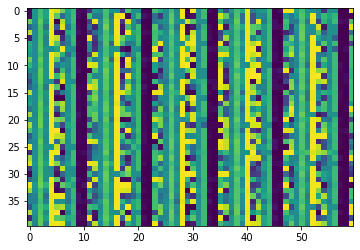

In [131]:
training = np.array(train_df, dtype = 'float32' )
import random

%time
i = np.random.randint(1,18013)
plt.imshow(training[i,1:].reshape(40,60));


### Let's take a look at the size of our target labels

In [132]:
train_df = train_df.rename({'Class ': 'Class'}, axis=1)
train_df.Class.value_counts()

1.0    9307
0.0    8706
Name: Class, dtype: int64

## Visualizing the Target Column Outcomes

In [133]:
dmap = { 1: "flocking", 0 : "non-flocking"}
df = train_df.copy()

df['Class'] = df['Class'].map(dmap)

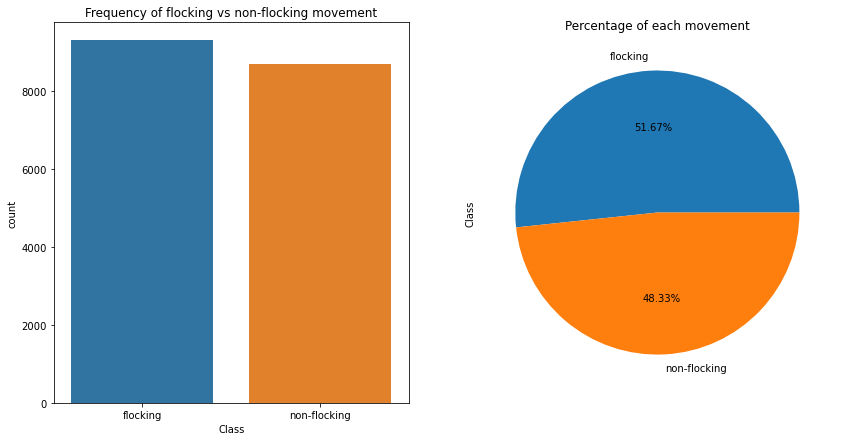

In [134]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='Class',data=df,ax=axs[0])
axs[0].set_title("Frequency of flocking vs non-flocking movement")
df['Class'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each movement")
plt.show()

## Feature Engineering

Here’s an outline of what we’ll be doing in this stage:

* Handle Missing Values


In [135]:
# null_counts = train_df.isnull().sum()
# print("Number of null values in each column:\n{}".format(null_counts))

### Let's drop any row with a missing value

In [136]:
train_df = train_df.dropna()

## Modelling

In [137]:
y = train_df['Class'] 
X = train_df.drop('Class', axis=1) 

In [138]:
# creating validating and training set
X_train, X_val, Y_train, Y_val = train_test_split(X,y,test_size=0.2,  random_state=1)

In [140]:
X_train.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,nAC1,nS1,x2,y2,xVel2,yVel2,xA2,yA2,xS2,yS2,xC2,yC2,nAC2,nS2,x3,y3,xVel3,yVel3,xA3,yA3,xS3,yS3,xC3,yC3,nAC3,nS3,x4,y4,xVel4,yVel4,xA4,yA4,xS4,yS4,xC4,yC4,nAC4,nS4,x5,y5,xVel5,yVel5,xA5,yA5,xS5,yS5,xC5,yC5,nAC5,nS5,...,x196,y196,xVel196,yVel196,xA196,yA196,xS196,yS196,xC196,yC196,nAC196,nS196,x197,y197,xVel197,yVel197,xA197,yA197,xS197,yS197,xC197,yC197,nAC197,nS197,x198,y198,xVel198,yVel198,xA198,yA198,xS198,yS198,xC198,yC198,nAC198,nS198,x199,y199,xVel199,yVel199,xA199,yA199,xS199,yS199,xC199,yC199,nAC199,nS199,x200,y200,xVel200,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200
3760,0.891310,0.788858,0.259579,0.408477,0.060,0.259804,0.932295,0.78318,0.337687,0.408582,0.019108,0.000000,0.408858,0.688648,0.554984,0.264866,0.509804,0.518519,0.165755,0.725355,0.500000,0.500000,0.000000,0.000000,0.274123,0.086276,0.387018,0.666229,0.034314,0.612745,0.004524,0.982630,0.472015,0.684701,0.121429,0.009615,0.863319,0.773381,0.270924,0.446684,0.044118,0.370892,0.426830,0.513565,0.317164,0.466418,0.006024,0.000000,0.263606,0.093173,0.316770,0.560043,0.024510,0.570093,0.475179,0.147768,0.666045,0.585821,0.051852,0.037037,...,0.282821,0.097704,0.254891,0.560137,0.020,0.636364,0.982380,0.953720,0.315299,0.472015,0.090361,0.117647,0.269100,0.106569,0.291961,0.640879,0.009950,0.549020,0.072062,0.638871,0.324627,0.434701,0.057554,0.028986,0.989939,0.845354,0.321121,0.389821,0.504950,0.518519,0.025050,0.076132,0.500000,0.500000,0.014493,0.0,0.276050,0.096505,0.295824,0.532556,0.039409,0.652582,0.947200,0.937301,0.313433,0.505597,0.079137,0.04,0.166847,0.928857,0.324959,0.585339,0.024510,0.539216,0.940951,0.843026,0.326493,0.432836,0.007042,0.000000
7781,0.025544,0.325633,0.307070,0.498920,0.220,0.485294,0.932295,0.78318,0.462687,0.546642,0.012739,0.000000,0.100934,0.372136,0.329361,0.508699,0.235294,0.523148,0.165755,0.725355,0.552239,0.472015,0.331210,0.015625,0.352163,0.323151,0.285714,0.528470,0.235294,0.485294,0.004636,0.982522,0.442164,0.516791,0.185714,0.009615,0.340751,0.434895,0.276902,0.592042,0.235294,0.507042,0.426830,0.513565,0.442164,0.483209,0.078313,0.000000,0.896835,0.398802,0.251148,0.467877,0.235294,0.518692,0.475179,0.147768,0.460821,0.455224,0.251852,0.000000,...,0.574169,0.214558,0.282337,0.532646,0.220,0.535885,0.982380,0.953720,0.507463,0.559701,0.361446,0.000000,0.599391,0.364232,0.241686,0.429425,0.223881,0.519608,0.071939,0.638432,0.509328,0.440299,0.532374,0.014493,0.438494,0.342114,0.264278,0.499729,0.227723,0.532407,0.025050,0.076132,0.442164,0.511194,0.246377,0.0,0.875397,0.363811,0.326193,0.503798,0.231527,0.530516,0.947200,0.937301,0.440299,0.494403,0.151079,0.00,0.423735,0.379725,0.300108,0.526373,0.235294,0.519608,0.940951,0.843026,0.488806,0.440299,0.492958,0.000000
11091,0.707058,0.991188,0.301403,0.407667,0.025,0.343137,0.932295,0.78318,0.500000,0.313433,0.012739,0.027778,0.730241,0.031327,0.326381,0.428200,0.058824,0.333333,0.165755,0.725355,0.360075,0.376866,0.019108,0.015625,0.070490,0.773299,0.287615,0.584099,0.107843,0.774510,0.004524,0.982630,0.429104,0.671642,0.028571,0.009615,0.212980,0.885272,0.261957,0.541645,0.058824,0.694836,0.426830,0.513565,0.402985,0.339552,0.006024,0.000000,0.633814,0.087823,0.274102,0.419355,0.049020,0.355140,0.475179,0.147768,0.628731,0.634328,0.029630,0.074074,...,0.438446,0.827799,0.276630,0.372456,0.035,0.320574,0.982380,0.953720,0.317164,0.531716,0.006024,0.000000,0.448778,0.776583,0.292485,0.423453,0.019900,0.382353,0.072062,0.638871,0.475746,0.315299,0.035971,0.014493,0.323421,0.949769,0.234375,0.472929,0.504950,0.518519,0.025050,0.076132,0.500000,0.500000,0.000000,0.0,0.578070,0.625174,0.247289,0.492675,0.507389,0.511737,0.947200,0.937301,0.500000,0.500000,0.000000,0.00,0.255500,0.776905,0.247704,0.511766,0.024510,0.568627,0.940951,0.843026,0.375000,0.638060,0.042254,0.015625
9394,0.526718,0.579471,0.535888,0.756479,0.500,0.490196,0.932295,0.78318,0.500000,0.500000,0.006369,0.000000,0.637970,0.455241,0.296858,0.653337,

## 2. build a baseline (simple) model

## DecisionTreeClassifier

In [150]:
# train scikit learn model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [174]:
model = DecisionTreeClassifier(max_depth=17, random_state=42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=17, random_state=42)

### Model Evaluation

In [175]:
print('DecisionTree model Accuracy: ', model.score(X_val,Y_val))

DecisionTree model Accuracy:  0.9961143491534832


In [176]:
print('DecisionTree model Accuracy: ', model.score(X_train,Y_train))

DecisionTree model Accuracy:  1.0


From the above, It appears that our model doesn't overfit on our validation set, we achieve close to 100% accuracy on both set

#### Let check the percentage of our classes **flocking or non-flocking**

In [177]:
Y_train.value_counts() / len(Y_train)

1.0    0.515753
0.0    0.484247
Name: Class, dtype: float64

### Feature Importance
Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [195]:
model.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

Let's turn this into a dataframe and visualize the most important features.

In [196]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [197]:
importance_df.head()

,feature,importance
1815,yVel152,0.532988
848,xC71,0.164398
1718,xVel144,0.090797
1280,xC107,0.060491
1433,yA120,0.046416


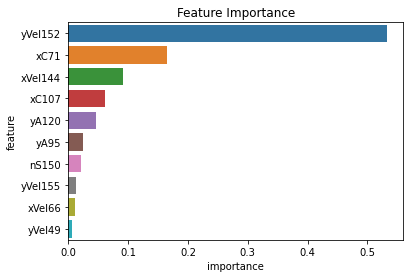

In [198]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

It looks like `yVel152` column has about 51% importance in classifying **flocking or non-flocking**

#### Let's visualize our tree using the first 10 depth

In [178]:
from sklearn.tree import plot_tree, export_text

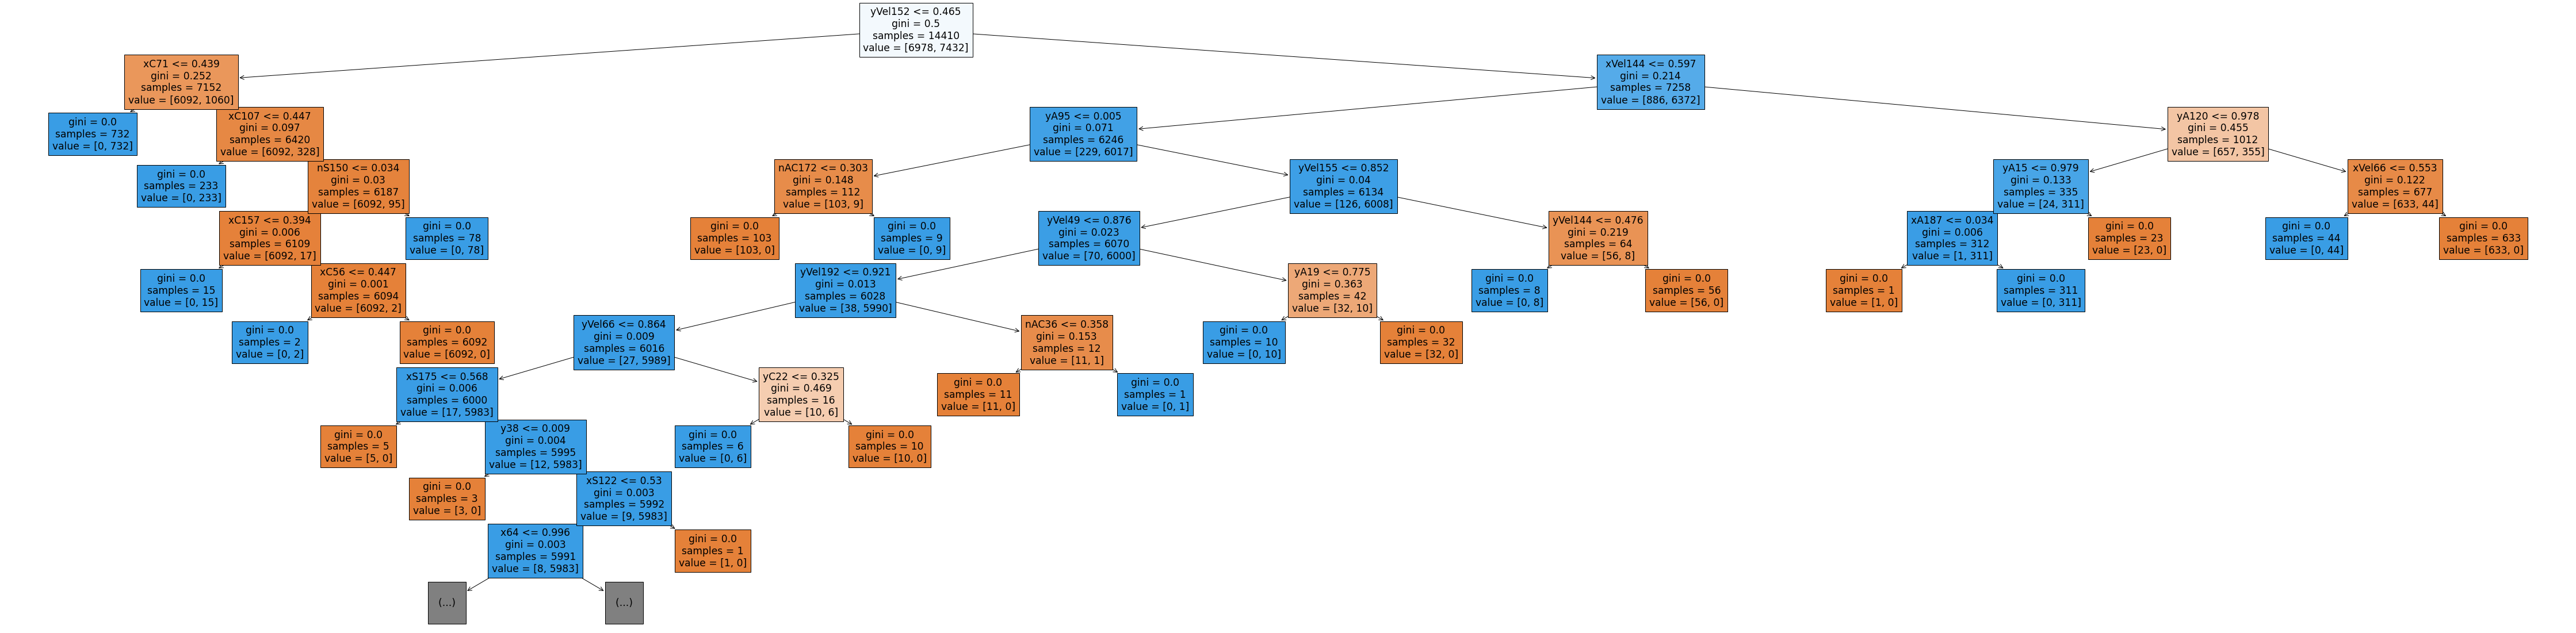

In [179]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=10, filled=True);

Let's experiment with different depths using a helper function. so that we can know the right depth to use for our model. This helps to avoid overfitting(model learning/memorizing the trainable parameter), which can make the model not to generalize well on the **validation & test set**

In [186]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, Y_train)
    train_acc = 1 - model.score(X_train, Y_train)
    val_acc = 1 - model.score(X_val, Y_val)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [187]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 20)])

CPU times: user 3min 5s, sys: 2.43 s, total: 3min 8s
Wall time: 3min 9s


In [188]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.135045,0.147655
1,2,0.063289,0.066611
2,3,0.020680,0.022204
3,4,0.006662,0.011102
4,5,0.003470,0.006106
5,6,0.001943,0.003608
6,7,0.001596,0.003608
7,8,0.000833,0.002498
8,9,0.000625,0.002220
9,10,0.000555,0.002775


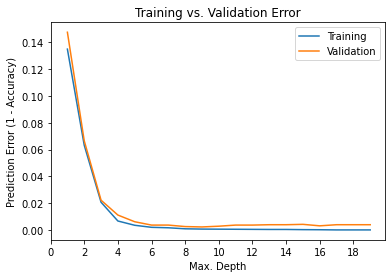

In [194]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,20, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [200]:
?DecisionTreeClassifier

After series of testing, I discovered that **Max_depth** of 15 leads to a better model.

They are other Hyperparameters we can also consider like the **max_leaf_nodes, criterion, splitter** etc. 

### We can evaluate our model on the test set 

In [213]:
path_to_data  = r'/Users/mac/Desktop/Bytework-assessment/AI_ML_Assessment/swarm_test_data.csv'
test_df = pd.read_csv(path_to_data, low_memory=False)

print(test_df.shape)
#Let's check the first five row of our dataset
test_df.head(5)

(6003, 2400)


,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,nAC1,nS1,x2,y2,xVel2,yVel2,xA2,yA2,xS2,yS2,xC2,yC2,nAC2,nS2,x3,y3,xVel3,yVel3,xA3,yA3,xS3,yS3,xC3,yC3,nAC3,nS3,x4,y4,xVel4,yVel4,xA4,yA4,xS4,yS4,xC4,yC4,nAC4,nS4,x5,y5,xVel5,yVel5,xA5,yA5,xS5,yS5,xC5,yC5,nAC5,nS5,...,x196,y196,xVel196,yVel196,xA196,yA196,xS196,yS196,xC196,yC196,nAC196,nS196,x197,y197,xVel197,yVel197,xA197,yA197,xS197,yS197,xC197,yC197,nAC197,nS197,x198,y198,xVel198,yVel198,xA198,yA198,xS198,yS198,xC198,yC198,nAC198,nS198,x199,y199,xVel199,yVel199,xA199,yA199,xS199,yS199,xC199,yC199,nAC199,nS199,x200,y200,xVel200,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200
0,-310.36,94.44,-3.49,-3.04,0.00,0.00,0.0,0.0,0.00,0.00,1,0,-998.82,-283.14,-2.39,-6.96,0.00,0.00,0.0,0.0,0.00,0.00,2,0,1322.64,-218.44,-1.71,-5.37,0.00,0.0,0.00,0.00,0.00,0.0,0,0,985.94,-182.72,-2.22,-8.84,0.00,0.00,0.0,0.00,0.00,0.00,0,0,787.84,551.58,1.30,-8.46,0.00,0.00,0.00,0.00,0.00,0.0,1,0,...,-1011.28,-864.56,-0.92,-4.25,0.00,0.00,0.00,0.00,0.00,0.00,0,0,-1221.20,-146.98,6.45,-1.33,0.00,0.00,0.00,0.00,0.00,0.00,1,0,623.32,-557.11,-5.08,-5.62,0.00,0.0,0.0,0.0,0.00,0.00,2,0,-942.15,-329.13,0.76,-4.84,0.00,0.00,0.0,0.0,0.00,0.00,4,0,614.44,493.14,-3.20,-5.30,0.00,0.00,0.0,0.0,0.00,0.00,0,0
1,875.60,645.34,-0.32,8.96,-0.04,1.00,0.0,0.0,-0.04,1.00,3,0,988.75,-295.00,-0.43,7.13,0.00,0.00,0.0,0.0,0.00,0.00,0,0,-559.80,-373.93,0.22,9.12,0.03,1.0,0.00,0.00,0.03,1.0,4,1,-557.49,1004.13,-0.35,7.88,-0.04,1.00,0.0,0.00,-0.06,1.00,1,1,876.99,606.60,-0.36,9.95,-0.04,1.00,0.00,0.00,-0.04,1.0,3,0,...,-548.70,150.77,0.13,8.40,0.01,1.00,0.00,0.00,0.01,1.00,10,3,-545.66,405.30,0.06,9.39,0.00,1.00,0.00,0.00,0.01,1.00,2,0,867.29,875.97,-0.31,8.60,-0.04,1.0,0.0,0.0,-0.04,1.00,3,2,-561.98,-463.88,0.17,7.90,0.02,1.00,0.0,0.0,0.02,1.00,6,2,-549.39,104.95,0.15,9.21,0.02,1.00,0.0,0.0,0.02,1.00,15,5
2,257.97,650.78,6.74,6.57,0.00,0.00,0.0,0.0,0.00,0.00,10,0,-1388.42,-815.44,-0.72,10.88,1.00,0.00,0.0,0.0,0.00,0.00,7,0,264.86,-881.48,1.95,-17.66,1.00,0.0,0.00,0.00,0.00,0.0,50,0,529.48,-429.75,7.09,13.30,1.00,0.00,0.0,0.00,0.00,0.00,16,1,-827.71,648.77,-8.34,4.54,0.00,0.00,0.00,0.00,0.00,0.0,8,0,...,-662.08,703.17,-10.67,7.54,0.00,1.00,0.00,0.00,0.00,0.00,45,0,-1124.13,689.15,5.69,13.50,0.00,-1.00,0.00,0.00,0.00,0.00,6,0,461.80,17.78,11.78,6.04,1.00,0.0,0.0,0.0,0.00,0.00,16,0,1003.54,347.31,-2.63,12.90,0.00,1.00,0.0,0.0,0.00,0.00,17,0,-175.13,806.51,-2.17,14.59,0.00,1.00,0.0,0.0,0.00,0.00,3,0
3,995.13,236.26,-0.76,-4.47,0.00,0.00,0.0,0.0,0.00,0.00,0,0,604.26,-351.68,-4.97,-7.94,0.00,0.00,0.0,0.0,0.00,0.00,3,0,677.36,-555.97,-0.90,-5.09,0.00,0.0,0.00,0.00,0.00,0.0,0,0,160.36,-408.66,-4.39,-4.98,0.00,0.00,0.0,0.00,0.00,0.00,1,0,-1199.18,269.69,6.11,-6.02,0.00,0.00,-0.06,1.24,0.00,0.0,1,1,...,908.37,901.66,-1.52,-3.34,0.00,0.00,0.00,0.00,0.00,0.00,1,0,1239.96,-472.71,3.90,0.41,0.00,0.00,0.00,0.00,0.00,0.00,2,0,-1270.84,-406.73,-5.83,-3.81,0.00,0.0,0.0,0.0,0.00,0.00,0,0,-1093.89,-532.38,-2.12,-3.74,0.00,0.00,0.0,0.0,0.00,0.00,1,0,-468.34,377.69,-3.37,-2.95,0.00,0.00,0.0,0.0,0.00,0.00,0,0
4,-782.80,-163.54,12.69,13.12,-0.19,0.98,0.0,0.0,0.17,-2.67,34,0,-797.42,876.73,10.76,4.80,0.58,0.81,0.0,0.0,1.46,-2.25,77,0,-746.88,685.01,5.20,8.93,0.60,0.8,1.33,1.27,1.99,1.8,89,8,-715.54,-330.10,17.99,4.76,-0.42,0.91,3.0,1.57,-0.80,-2.56,42,4,374.74,292.10,-6.96,6.44,-0.21,-0.98,-5.65,20.32,-1.89,-1.9,33,3,...,200.73,154.64,-7.72,-16.02,-0.24,-0.97,-3.84,-4.91,2.16,1.58,33,3,-677.62,771.90,-3.17,-17.04,0.61,0.79,1.52,-3.03,-0.95,-2.51,81,11,-670.16,-809.49,-12.73,10.07,-0.01,1.0,0.0,0.0,-0.55,2.62,14,0,227.11,85.31,-15.14,-6.56,-0.70,-0.71,-1.4,-1.2,1.13,2.43,31,2,-898.63,819.30,9.68,-1.86,0.69,0.73,0.0,0.0,2.04,-1.74,59,0


In [216]:
test_preds =  model.predict(test_df)
test_preds

array([1., 0., 1., ..., 1., 0., 1.])

## 3. explore II other hyperparameterized models

### Support Vector Machine

In [55]:
from sklearn import svm
# SVM regularization parameter
C = 1.0  

# SVC with a Linear Kernel  (our original example)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, Y_train)

### Model Evaluation

In [56]:
# Predicted outcomes
predicted = svc.predict(X_validate)

# Actual Expected Outvomes
expected = Y_validate

print(metrics.accuracy_score(expected, predicted))

0.9877879544823758


### RandomForestClassifier

In [141]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators
clf = RandomForestClassifier(n_estimators=100,random_state=1)
clf.fit(X_train,Y_train)

RandomForestClassifier(random_state=1)

4. ## evaluate the performance of your best model on the test dataset using appropriate metric

### Model Evaluation

In [146]:
# Predicted outcomes
predicted = clf.predict(X_val)

# Actual Expected Outvomes
expected = Y_val
print(metrics.accuracy_score(expected, predicted))

1.0


#### From the above Model Evaluation, We can clearly see that the RandomForest Classifier achieve a better accuracy than the rest of the models

#### Let's Display a classification report forour model

In [63]:
from sklearn.metrics import classification_report

num_classes = 2
target_names = ['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(Y_validate, predicted, target_names = target_names))
# print('Accuracy: ', accuracy_score(label_test,predictions))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1728
     Class 1       1.00      1.00      1.00      1875

    accuracy                           1.00      3603
   macro avg       1.00      1.00      1.00      3603
weighted avg       1.00      1.00      1.00      3603



It appears our model performs well on the validation dataset with a recall,precision,f1-score and accuracy of 100%

### Let's see How our model performs on the test dataset

In [65]:
#read test dataset
test_df = pd.read_csv(r'AI_ML_Assessment\swarm_test_data.csv', low_memory=False)


In [71]:
# Predicted outcomes
test_prediction = clf.predict(test_df)

In [ ]:
# list(test_prediction)

## visualize and interprete the confusion matrix of your class label prediction on the test dataset

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[1728    0]
 [   0 1875]]


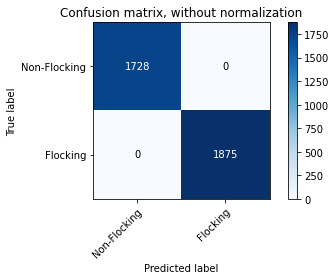

In [85]:
print(__doc__)
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ['Non-Flocking','Flocking']

plot_confusion_matrix(Y_validate, predictions, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()

From the above matrix, we can see that the confusion matrix help us to summarize **correct prediction** vs **incorrect prediction** with the count values broken down by each class(Flocking vs Non-Flocking).

The above matrix for our model can be broken down into four outcome.

1. True Positive(TP): Outcome where the model correctly predicts the positive class.

2. True Negative (TN): Outcome where the model correctly predicts the negative class.
    

3. False Positive (FP): Also called a type 1 error, an outcome where the model incorrectly predicts the positive class when it is actually negative.
    

4. False Negative (FN): Also called a type 2 error, an outcome where the model incorrectly predicts the negative class when it is actually positive.


The goal of our prediction is to ensure that we attain 0 or close to Zero **False positive** and **False Negative**.

With an Accuracy of 100%, Our model was able to attain a **0 False positive** and **0 False Negative**